## Classifier with Convolutional Neural Network (CNN)
In this mini project, we would build a classifier for handwritten English alphabet letters using a small convolutional neural network (CNN). We use the EMNIST Letters dataset (https://www.nist.gov/itl/products-and-services/emnist-dataset, http://arxiv.org/abs/1702.05373). Hyperparameters are adopted and modified from the PyTorch tutorial for classifier using the CIFAR10 dataset (https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html).

We first load the necessary libraries. We use PyTorch for the machine learning framework.

In [1]:
import torch
import torchvision as tv
from torch import nn
from tqdm import tqdm
import matplotlib.pyplot as plt

### EMNIST dataset
We load the training data and testing data of EMNIST Letters dataset through torchvision, and then divide the testing data additionally so that 5% of the loaded testing data is earmarked for the validation data, while we use the rest of the date for the testing dataset. For the demonstration, we present a small sample of images and labels in the dataset. Each image is a greyscale 28×28 pixels image, and the labels range from 1 to 26 representing 'A' through 'Z'. Note that the labels are case-insensitive for the Letters dataset we use in this project.

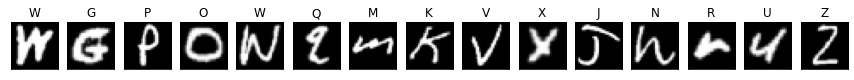

In [2]:
transform=tv.transforms.Compose([
    tv.transforms.ToTensor(),
    tv.transforms.Normalize(0.5,0.5)
])
train_set=tv.datasets.EMNIST(".","letters",train=True,download=False,transform=transform)
raw_test_set=tv.datasets.EMNIST(".","letters",train=False,download=False,transform=transform)
n_train=len(train_set); n_raw=len(raw_test_set)
n_cv=int(n_raw*0.05); n_test=n_raw-n_cv
cv_set,test_set=torch.utils.data.random_split(raw_test_set,[n_cv,n_test])

n_show_sample=15
plt.figure(figsize=(n_show_sample,1))
letter_label=[chr(64+i) for i in range(27)]
for i in range(n_show_sample):
    img,lbl=train_set.__getitem__(i)
    plt.subplot(1,n_show_sample,i+1)
    img=(img+1)/2
    plt.imshow(torch.transpose(img.view((28,28)),0,1))
    plt.gray(); plt.xticks([]); plt.yticks([]); plt.title(letter_label[lbl])
plt.show()

### CNN model
Our neural network starts with two 2D convolutiona layers with 5×5 kernels where each layer is followed by a ReLU activation function and a 2×2 max pooling layer. This transforms a single channel 28×28 pixels image into a 3-channel 12×12 pixels image, then into a 8-channel 4×4 pixels image. The next layer flattens the image into a 128-dimensional vector and two fully connected layers (one with 64 units, one with 26 units) are followed. The 64-unit layer is followed by ReLU activation function while the other layer end with no activation function, since the exponentiation part of the cross entropy loss is included in the function provided in PyTorch.

In [3]:
class Classifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.seq=nn.Sequential(
            nn.Conv2d(1,3,5),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Conv2d(3,8,5),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            nn.Flatten(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,26)
        )        
    def forward(self, img):
        return self.seq(img)

For optimization, we use stochastic gradient descent with momentum while the learning parameters are adopted from https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html. We also randomize the initial network.

In [4]:
learn_rate=0.001
momentum=0.9
device='cpu'

cls=Classifier().to(device)
cls_optimizer=torch.optim.SGD(cls.parameters(), lr=learn_rate, momentum=momentum)

def initialization(layer):
    if type(layer)==nn.Conv2d:
        nn.init.normal_(layer.weight, 0, 0.02)
    if type(layer)==nn.Linear:
        nn.init.normal_(layer.weight, 0, 0.02)
        nn.init.constant_(layer.bias, 0)
cls=cls.apply(initialization)

loss_fn=nn.CrossEntropyLoss()

### Training the model
We train the model for 5 epochs with batch size 4. To check the progress, we present the loss and accuracy for every 5% progress in each epoch. Note that the presented accuracies are measured on the validation dataset which is far smaller than the test dataset, so the number might be slightly off from the accuracy measured on the test dataset.

  5%|▍         | 1559/31200 [00:05<01:43, 287.37it/s]

epoch  1 : loss= 3.2586885328476245 , accuracy= 0.04038461538461539


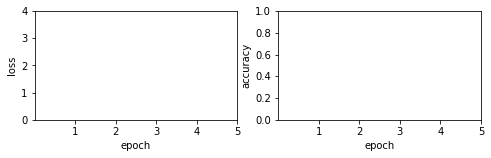

 10%|▉         | 3107/31200 [00:12<01:47, 260.45it/s]

epoch  1 : loss= 3.258676809225327 , accuracy= 0.035576923076923075


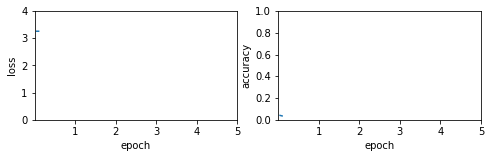

 15%|█▍        | 4657/31200 [00:18<01:32, 288.16it/s]

epoch  1 : loss= 3.2589171869632527 , accuracy= 0.035576923076923075


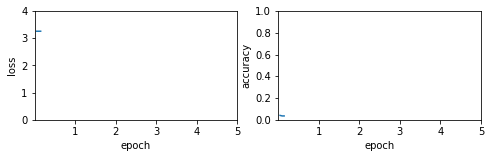

 20%|█▉        | 6225/31200 [00:25<01:25, 290.51it/s]

epoch  1 : loss= 3.2585186483004156 , accuracy= 0.04903846153846154


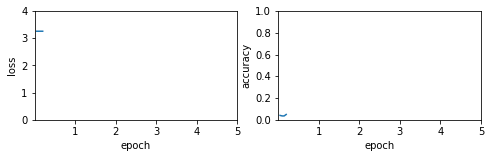

 25%|██▍       | 7791/31200 [00:32<01:19, 292.74it/s]

epoch  1 : loss= 3.257976377163178 , accuracy= 0.051923076923076926


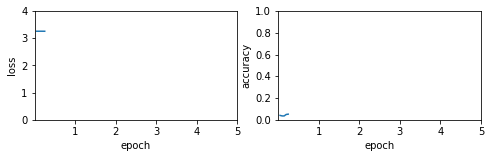

 30%|██▉       | 9340/31200 [00:38<01:15, 290.66it/s]

epoch  1 : loss= 3.254807734489441 , accuracy= 0.06346153846153846


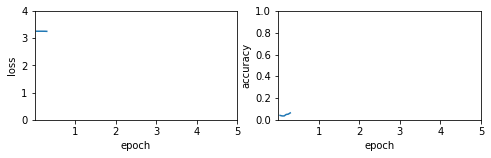

 35%|███▍      | 10894/31200 [00:45<01:09, 292.50it/s]

epoch  1 : loss= 2.48545473730908 , accuracy= 0.5019230769230769


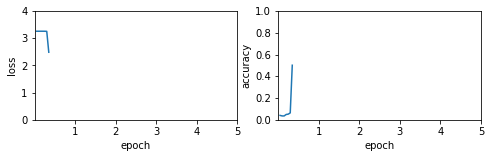

 40%|███▉      | 12467/31200 [00:51<01:04, 290.60it/s]

epoch  1 : loss= 1.2693159548756785 , accuracy= 0.6326923076923077


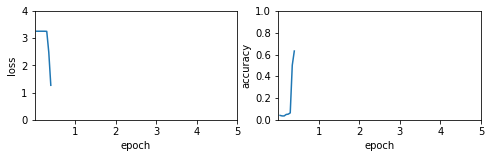

 45%|████▍     | 14019/31200 [00:58<01:03, 272.44it/s]

epoch  1 : loss= 0.9742907198151955 , accuracy= 0.6990384615384615


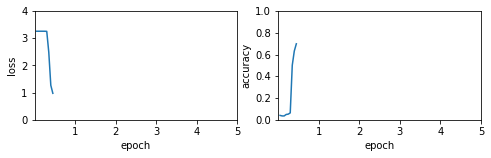

 50%|████▉     | 15573/31200 [01:04<00:53, 291.01it/s]

epoch  1 : loss= 0.8206749978176772 , accuracy= 0.7769230769230769


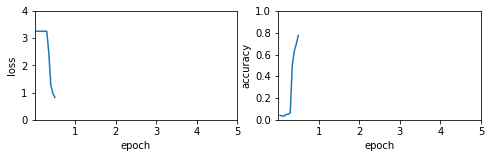

 55%|█████▍    | 17133/31200 [01:11<00:50, 280.02it/s]

epoch  1 : loss= 0.6891462459567731 , accuracy= 0.7865384615384615


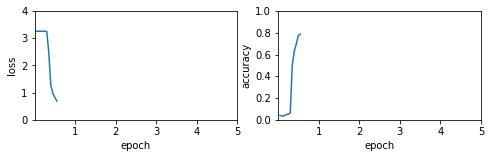

 60%|█████▉    | 18705/31200 [01:17<00:42, 291.76it/s]

epoch  1 : loss= 0.6278199819173329 , accuracy= 0.7865384615384615


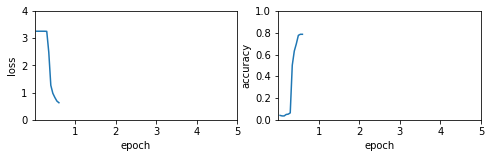

 65%|██████▍   | 20266/31200 [01:24<00:37, 289.68it/s]

epoch  1 : loss= 0.5909408198472542 , accuracy= 0.8153846153846154


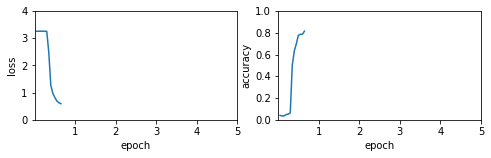

 70%|██████▉   | 21836/31200 [01:30<00:32, 291.27it/s]

epoch  1 : loss= 0.573385244449123 , accuracy= 0.8288461538461539


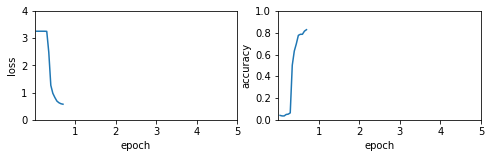

 75%|███████▍  | 23390/31200 [01:37<00:26, 289.68it/s]

epoch  1 : loss= 0.5488218975208629 , accuracy= 0.8192307692307692


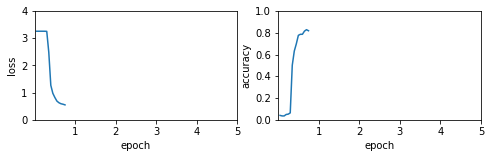

 80%|███████▉  | 24941/31200 [01:43<00:21, 291.55it/s]

epoch  1 : loss= 0.49979286643494375 , accuracy= 0.8394230769230769


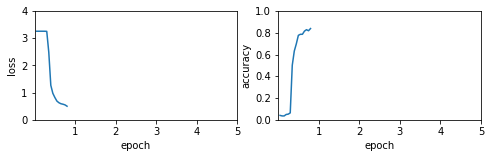

 85%|████████▍ | 26498/31200 [01:50<00:16, 292.77it/s]

epoch  1 : loss= 0.49059616790282934 , accuracy= 0.8163461538461538


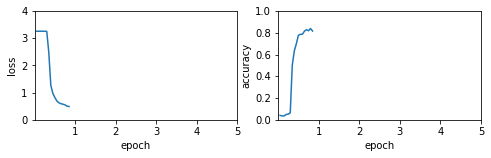

 90%|████████▉ | 28056/31200 [01:56<00:10, 292.48it/s]

epoch  1 : loss= 0.47853755931704284 , accuracy= 0.8442307692307692


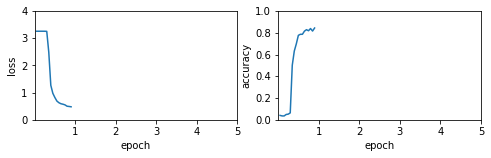

 95%|█████████▍| 29639/31200 [02:02<00:05, 291.29it/s]

epoch  1 : loss= 0.46464690915469337 , accuracy= 0.8471153846153846


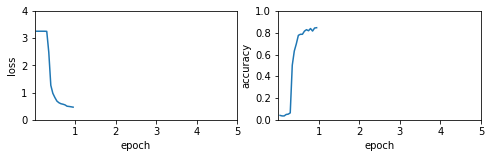

100%|█████████▉| 31177/31200 [02:09<00:00, 290.27it/s]

epoch  1 : loss= 0.4814913673068543 , accuracy= 0.8288461538461539


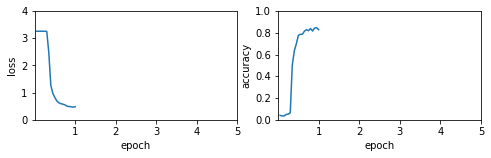

  5%|▍         | 1548/31200 [00:05<01:41, 291.65it/s]

epoch  2 : loss= 0.4213693340155983 , accuracy= 0.8490384615384615


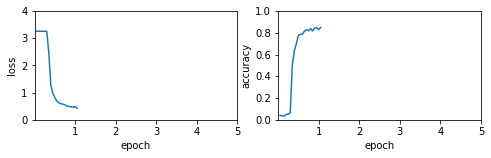

 10%|▉         | 3095/31200 [00:11<01:36, 291.89it/s]

epoch  2 : loss= 0.4295465630676914 , accuracy= 0.8423076923076923


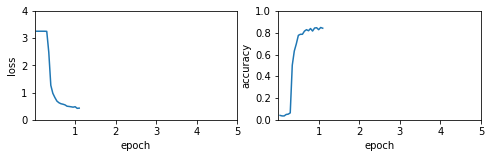

 15%|█▍        | 4676/31200 [00:18<01:32, 287.02it/s]

epoch  2 : loss= 0.4391430858403253 , accuracy= 0.8336538461538462


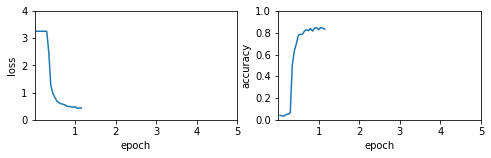

 20%|█▉        | 6223/31200 [00:24<01:25, 291.09it/s]

epoch  2 : loss= 0.41942011416197206 , accuracy= 0.8548076923076923


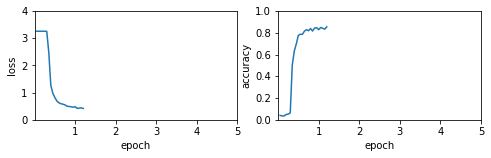

 25%|██▍       | 7788/31200 [00:31<01:21, 285.62it/s]

epoch  2 : loss= 0.3877590583078414 , accuracy= 0.8442307692307692


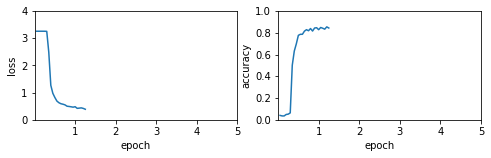

 30%|██▉       | 9348/31200 [00:37<01:16, 284.19it/s]

epoch  2 : loss= 0.38488594852188285 , accuracy= 0.8480769230769231


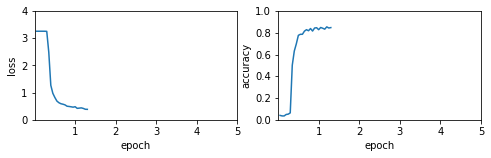

 35%|███▍      | 10892/31200 [00:44<01:09, 290.93it/s]

epoch  2 : loss= 0.4039556733474642 , accuracy= 0.8509615384615384


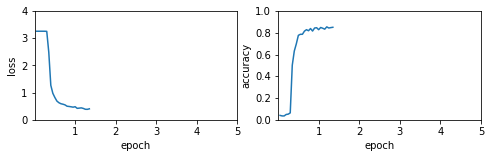

 40%|███▉      | 12468/31200 [00:50<01:04, 291.50it/s]

epoch  2 : loss= 0.3873671379303209 , accuracy= 0.8721153846153846


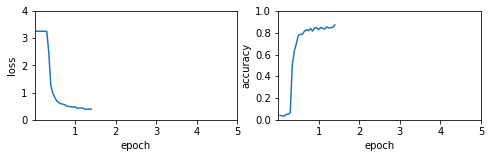

 45%|████▍     | 14025/31200 [00:57<01:03, 269.53it/s]

epoch  2 : loss= 0.4060519315336513 , accuracy= 0.8615384615384616


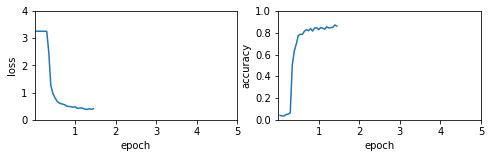

 50%|████▉     | 15574/31200 [01:03<00:53, 291.51it/s]

epoch  2 : loss= 0.3874935056426367 , accuracy= 0.8701923076923077


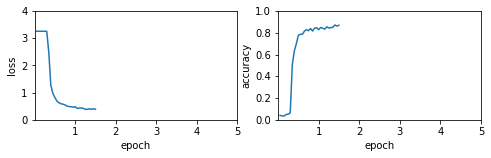

 55%|█████▍    | 17156/31200 [01:10<00:49, 281.72it/s]

epoch  2 : loss= 0.37008692172302965 , accuracy= 0.8596153846153847


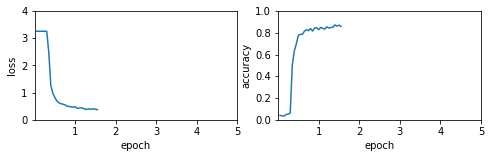

 60%|█████▉    | 18705/31200 [01:17<00:58, 213.54it/s]

epoch  2 : loss= 0.372115738424868 , accuracy= 0.875


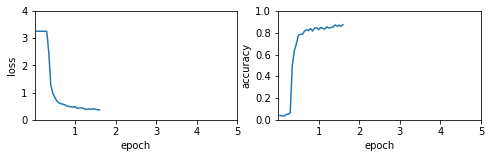

 65%|██████▍   | 20268/31200 [01:24<00:43, 251.37it/s]

epoch  2 : loss= 0.3954342288902598 , accuracy= 0.8634615384615385


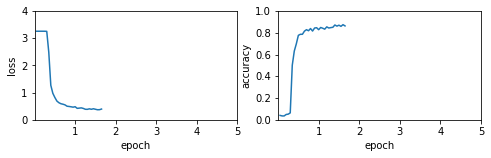

 70%|██████▉   | 21820/31200 [01:31<00:32, 290.49it/s]

epoch  2 : loss= 0.3583455887131724 , accuracy= 0.875


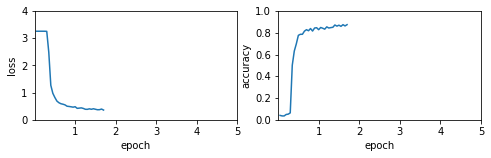

 75%|███████▍  | 23373/31200 [01:37<00:27, 289.62it/s]

epoch  2 : loss= 0.36498904862298964 , accuracy= 0.8634615384615385


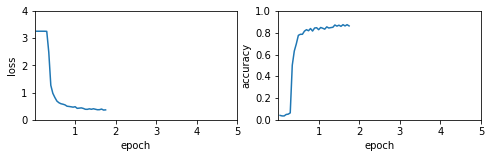

 80%|███████▉  | 24942/31200 [01:44<00:21, 286.46it/s]

epoch  2 : loss= 0.3716950906164129 , accuracy= 0.8730769230769231


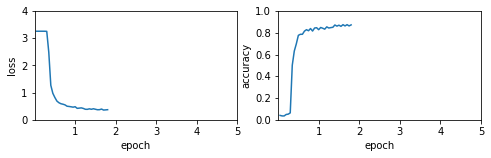

 85%|████████▍ | 26501/31200 [01:50<00:16, 287.13it/s]

epoch  2 : loss= 0.3688712882424648 , accuracy= 0.8788461538461538


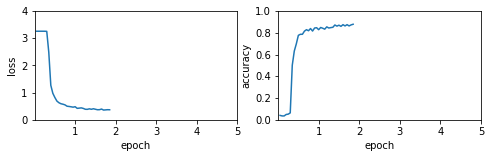

 90%|████████▉ | 28059/31200 [01:57<00:10, 289.48it/s]

epoch  2 : loss= 0.35980210061142526 , accuracy= 0.8759615384615385


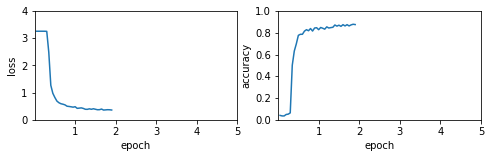

 95%|█████████▍| 29631/31200 [02:03<00:05, 290.85it/s]

epoch  2 : loss= 0.355161519286981 , accuracy= 0.875


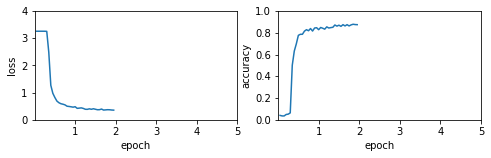

100%|█████████▉| 31174/31200 [02:10<00:00, 281.64it/s]

epoch  2 : loss= 0.34851617619058695 , accuracy= 0.8634615384615385


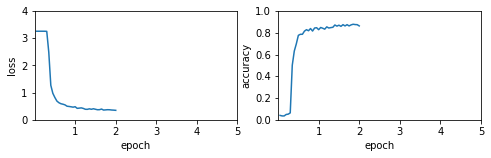

  5%|▍         | 1546/31200 [00:05<01:42, 290.30it/s]

epoch  3 : loss= 0.33468879291906023 , accuracy= 0.8596153846153847


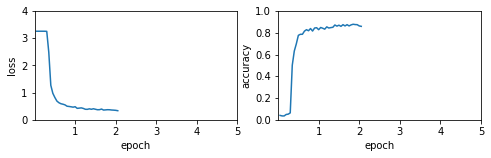

 10%|▉         | 3092/31200 [00:11<01:37, 287.42it/s]

epoch  3 : loss= 0.3349936174382142 , accuracy= 0.8836538461538461


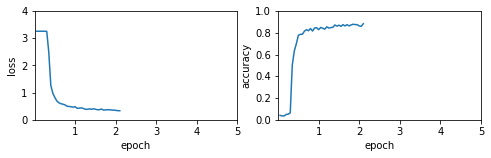

 15%|█▍        | 4657/31200 [00:18<01:31, 288.68it/s]

epoch  3 : loss= 0.353888177691279 , accuracy= 0.8903846153846153


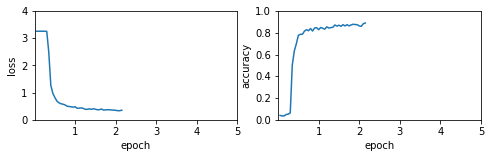

 20%|█▉        | 6224/31200 [00:24<01:26, 288.25it/s]

epoch  3 : loss= 0.3281417500925249 , accuracy= 0.8769230769230769


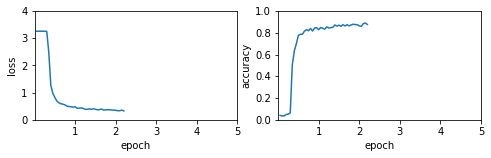

 25%|██▍       | 7795/31200 [00:31<01:21, 287.80it/s]

epoch  3 : loss= 0.34071672684315274 , accuracy= 0.8875


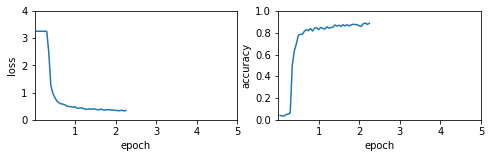

 30%|██▉       | 9345/31200 [00:37<01:15, 288.20it/s]

epoch  3 : loss= 0.3075604446067117 , accuracy= 0.8903846153846153


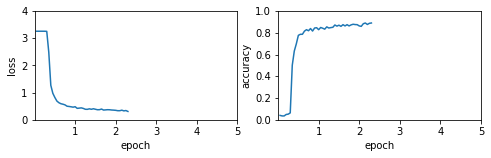

 35%|███▍      | 10892/31200 [00:44<01:10, 288.16it/s]

epoch  3 : loss= 0.32982260138630337 , accuracy= 0.8798076923076923


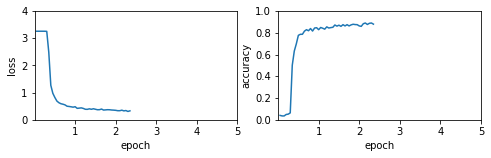

 40%|███▉      | 12452/31200 [00:50<01:05, 288.38it/s]

epoch  3 : loss= 0.33775037598176055 , accuracy= 0.8807692307692307


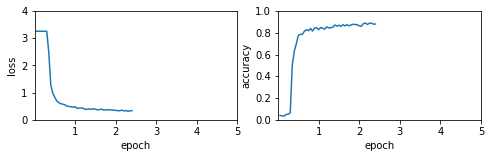

 45%|████▍     | 14019/31200 [00:57<00:59, 286.67it/s]

epoch  3 : loss= 0.33437233084215945 , accuracy= 0.8778846153846154


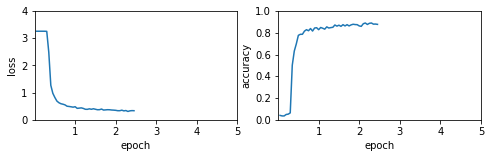

 50%|████▉     | 15597/31200 [01:03<00:53, 289.44it/s]

epoch  3 : loss= 0.3349038241514884 , accuracy= 0.8759615384615385


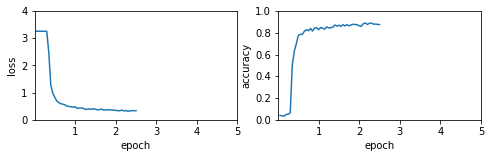

 55%|█████▍    | 17135/31200 [01:10<00:48, 287.66it/s]

epoch  3 : loss= 0.328477652064985 , accuracy= 0.8711538461538462


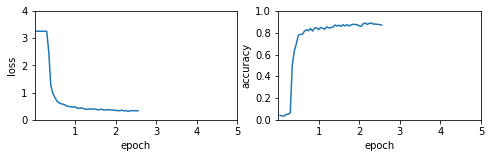

 60%|█████▉    | 18700/31200 [01:16<00:43, 286.61it/s]

epoch  3 : loss= 0.3263200180994784 , accuracy= 0.885576923076923


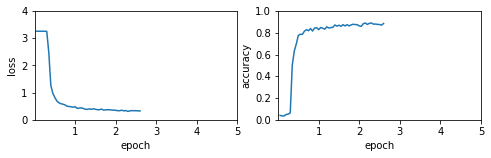

 65%|██████▍   | 20272/31200 [01:23<00:37, 290.63it/s]

epoch  3 : loss= 0.3181062759889569 , accuracy= 0.8826923076923077


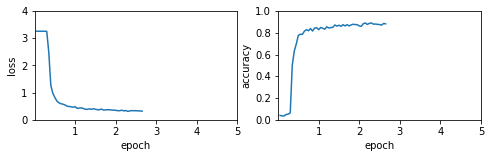

 70%|██████▉   | 21812/31200 [01:29<00:32, 287.23it/s]

epoch  3 : loss= 0.33276136907880777 , accuracy= 0.8913461538461539


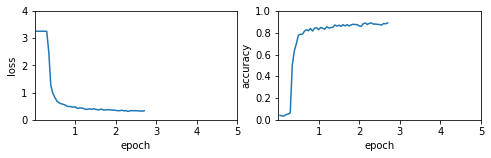

 75%|███████▍  | 23377/31200 [01:36<00:28, 270.20it/s]

epoch  3 : loss= 0.32270686904124046 , accuracy= 0.8721153846153846


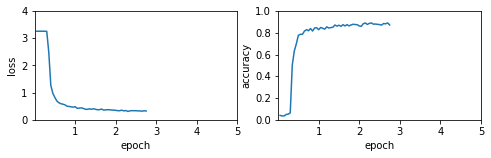

 80%|███████▉  | 24954/31200 [01:42<00:21, 289.01it/s]

epoch  3 : loss= 0.30722274082798273 , accuracy= 0.885576923076923


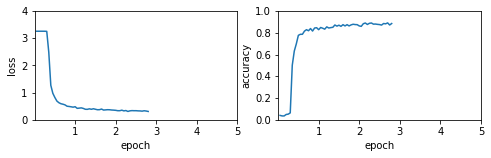

 85%|████████▍ | 26512/31200 [01:49<00:16, 291.64it/s]

epoch  3 : loss= 0.32237061220089697 , accuracy= 0.8980769230769231


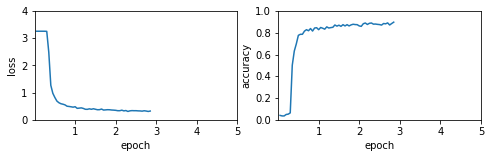

 90%|████████▉ | 28067/31200 [01:55<00:10, 289.49it/s]

epoch  3 : loss= 0.31174292771904266 , accuracy= 0.8740384615384615


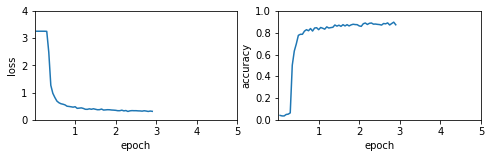

 95%|█████████▍| 29625/31200 [02:02<00:05, 289.57it/s]

epoch  3 : loss= 0.31475888721013173 , accuracy= 0.8903846153846153


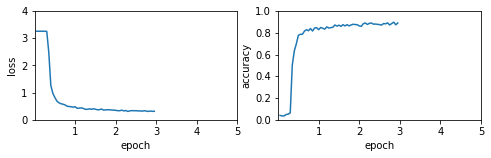

100%|█████████▉| 31177/31200 [02:08<00:00, 291.80it/s]

epoch  3 : loss= 0.3033649363460753 , accuracy= 0.8961538461538462


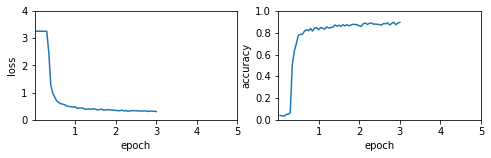

  5%|▍         | 1541/31200 [00:05<01:43, 286.15it/s]

epoch  4 : loss= 0.27629729160255057 , accuracy= 0.8913461538461539


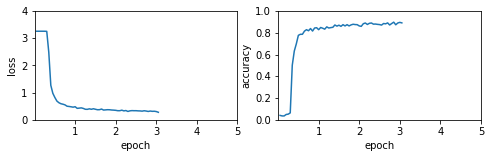

 10%|▉         | 3097/31200 [00:11<01:36, 290.72it/s]

epoch  4 : loss= 0.3129929451083463 , accuracy= 0.8913461538461539


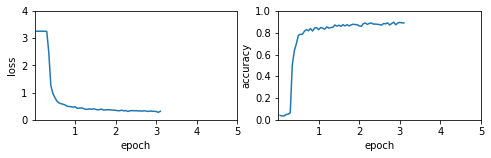

 15%|█▍        | 4651/31200 [00:18<01:31, 290.43it/s]

epoch  4 : loss= 0.2793931695767708 , accuracy= 0.8923076923076924


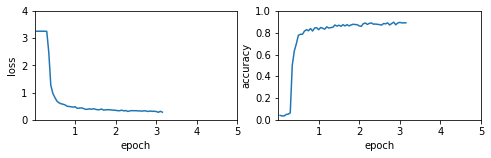

 20%|█▉        | 6218/31200 [00:24<01:26, 288.08it/s]

epoch  4 : loss= 0.30420694948972177 , accuracy= 0.8875


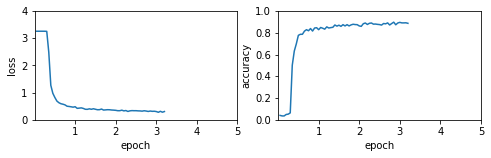

 25%|██▍       | 7789/31200 [00:31<01:21, 288.67it/s]

epoch  4 : loss= 0.3011092510009826 , accuracy= 0.8980769230769231


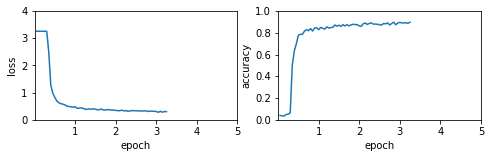

 30%|██▉       | 9359/31200 [00:37<01:26, 251.30it/s]

epoch  4 : loss= 0.30516048167814563 , accuracy= 0.8961538461538462


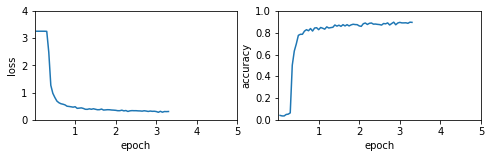

 35%|███▍      | 10896/31200 [00:44<01:10, 288.53it/s]

epoch  4 : loss= 0.30519143521285935 , accuracy= 0.8951923076923077


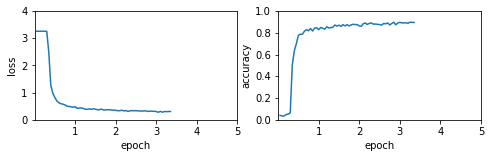

 40%|███▉      | 12462/31200 [00:50<01:05, 287.40it/s]

epoch  4 : loss= 0.2993556592159248 , accuracy= 0.8971153846153846


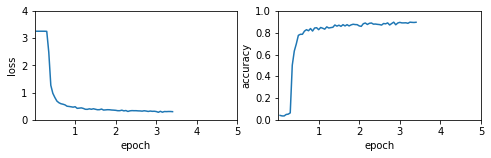

 45%|████▍     | 14028/31200 [00:57<01:00, 286.01it/s]

epoch  4 : loss= 0.3070509586836404 , accuracy= 0.8951923076923077


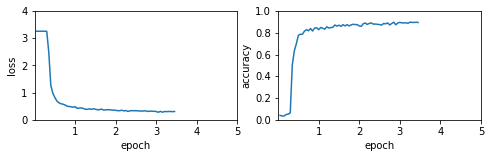

 50%|████▉     | 15593/31200 [01:03<00:55, 281.13it/s]

epoch  4 : loss= 0.29690883179892597 , accuracy= 0.8846153846153846


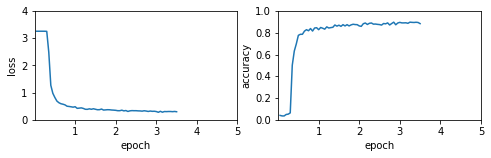

 55%|█████▍    | 17132/31200 [01:10<00:48, 288.53it/s]

epoch  4 : loss= 0.2923914800139149 , accuracy= 0.8884615384615384


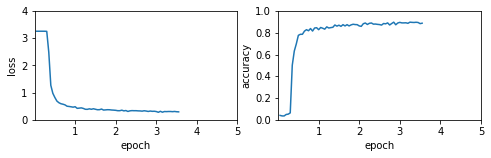

 60%|█████▉    | 18698/31200 [01:16<00:43, 287.32it/s]

epoch  4 : loss= 0.30757956933980146 , accuracy= 0.8807692307692307


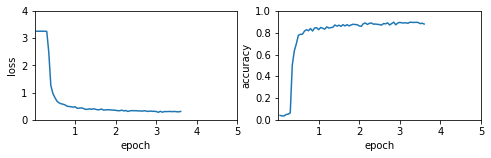

 65%|██████▍   | 20275/31200 [01:23<00:37, 288.63it/s]

epoch  4 : loss= 0.29521043517288026 , accuracy= 0.8884615384615384


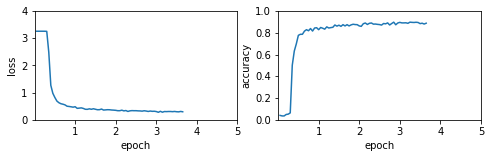

 70%|██████▉   | 21820/31200 [01:30<00:32, 286.11it/s]

epoch  4 : loss= 0.28827114068778126 , accuracy= 0.8846153846153846


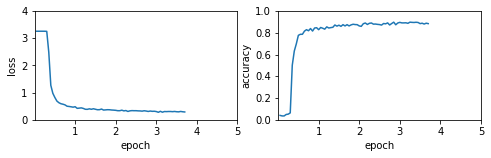

 75%|███████▍  | 23384/31200 [01:36<00:27, 287.05it/s]

epoch  4 : loss= 0.28625145528311313 , accuracy= 0.8913461538461539


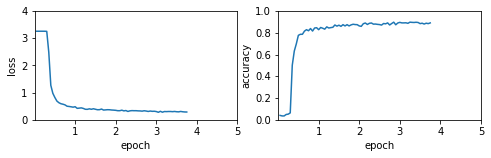

 80%|███████▉  | 24946/31200 [01:43<00:21, 284.60it/s]

epoch  4 : loss= 0.3035295715198094 , accuracy= 0.8788461538461538


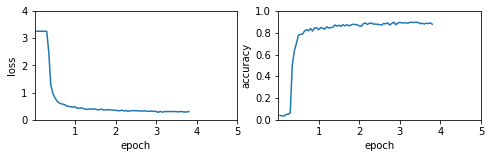

 85%|████████▍ | 26502/31200 [01:49<00:16, 286.91it/s]

epoch  4 : loss= 0.2998409973100934 , accuracy= 0.885576923076923


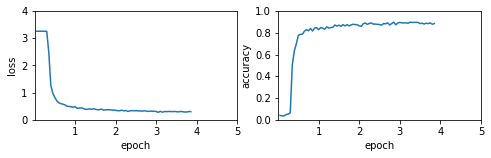

 90%|████████▉ | 28071/31200 [01:56<00:10, 288.22it/s]

epoch  4 : loss= 0.2985511471931554 , accuracy= 0.8923076923076924


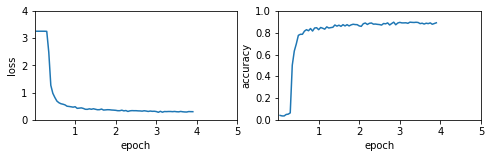

 95%|█████████▍| 29623/31200 [02:02<00:05, 285.33it/s]

epoch  4 : loss= 0.29805612142593957 , accuracy= 0.8903846153846153


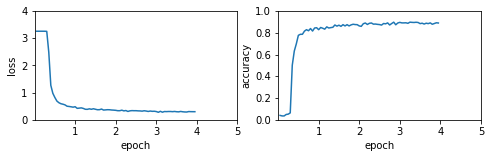

100%|█████████▉| 31184/31200 [02:09<00:00, 288.92it/s]

epoch  4 : loss= 0.3026278029532897 , accuracy= 0.9019230769230769


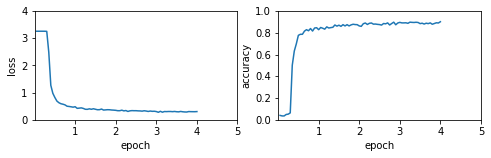

  5%|▍         | 1535/31200 [00:05<01:43, 286.95it/s]

epoch  5 : loss= 0.27400671439516794 , accuracy= 0.8923076923076924


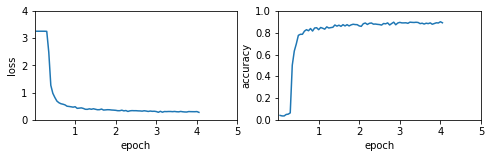

 10%|▉         | 3105/31200 [00:11<01:37, 287.70it/s]

epoch  5 : loss= 0.2857928280949683 , accuracy= 0.8913461538461539


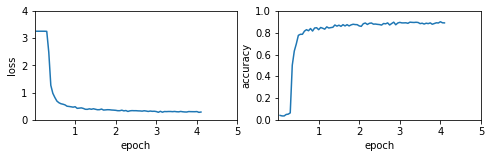

 15%|█▍        | 4672/31200 [00:18<01:32, 287.81it/s]

epoch  5 : loss= 0.27371539192161154 , accuracy= 0.8913461538461539


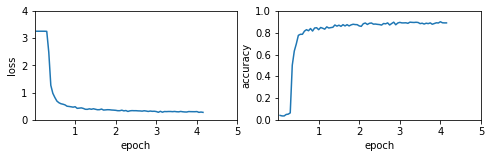

 20%|█▉        | 6227/31200 [00:24<01:34, 263.89it/s]

epoch  5 : loss= 0.2788219271237419 , accuracy= 0.8846153846153846


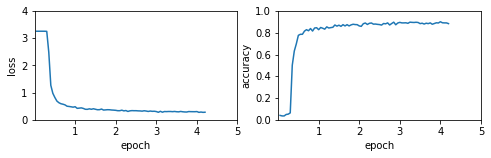

 25%|██▍       | 7780/31200 [00:31<01:21, 288.72it/s]

epoch  5 : loss= 0.27469429000496187 , accuracy= 0.8875


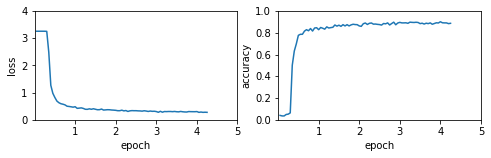

 30%|██▉       | 9352/31200 [00:38<01:15, 288.55it/s]

epoch  5 : loss= 0.28506130202012847 , accuracy= 0.9019230769230769


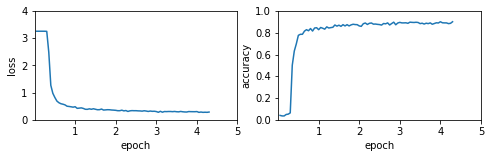

 35%|███▍      | 10918/31200 [00:44<01:10, 287.45it/s]

epoch  5 : loss= 0.2943722283196761 , accuracy= 0.8932692307692308


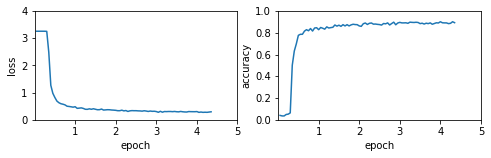

 40%|███▉      | 12455/31200 [00:51<01:05, 287.13it/s]

epoch  5 : loss= 0.27482239484929427 , accuracy= 0.8903846153846153


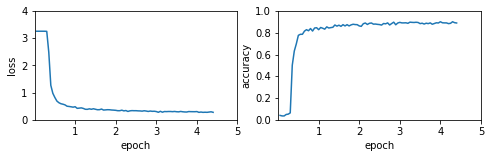

 45%|████▍     | 14019/31200 [00:57<00:59, 287.04it/s]

epoch  5 : loss= 0.28907349387561504 , accuracy= 0.8951923076923077


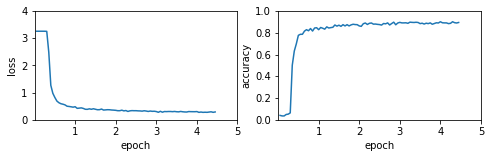

 50%|████▉     | 15584/31200 [01:04<00:54, 285.83it/s]

epoch  5 : loss= 0.2793398531353607 , accuracy= 0.8903846153846153


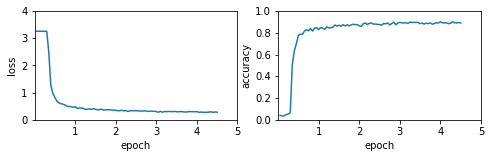

 55%|█████▍    | 17147/31200 [01:10<00:48, 287.82it/s]

epoch  5 : loss= 0.26470240958860114 , accuracy= 0.8807692307692307


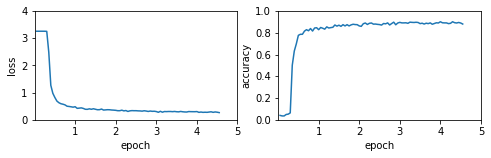

 60%|█████▉    | 18693/31200 [01:17<00:43, 288.30it/s]

epoch  5 : loss= 0.28326720793086285 , accuracy= 0.8913461538461539


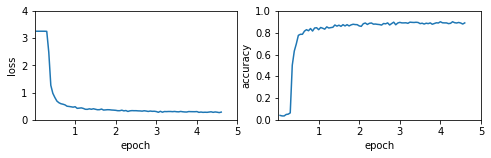

 65%|██████▍   | 20261/31200 [01:23<00:37, 288.45it/s]

epoch  5 : loss= 0.2841413140488956 , accuracy= 0.9


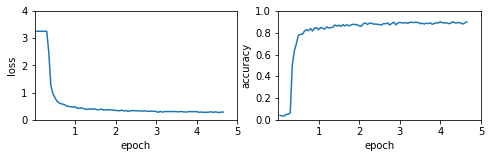

 70%|██████▉   | 21827/31200 [01:30<00:32, 287.50it/s]

epoch  5 : loss= 0.28438907114961276 , accuracy= 0.8807692307692307


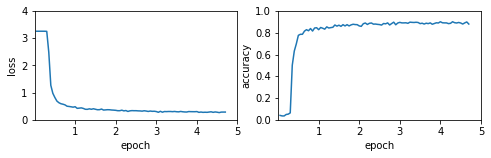

 75%|███████▍  | 23395/31200 [01:36<00:27, 286.38it/s]

epoch  5 : loss= 0.2740276991904804 , accuracy= 0.8913461538461539


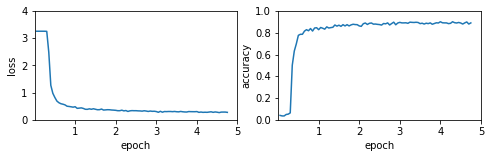

 80%|███████▉  | 24939/31200 [01:43<00:21, 287.41it/s]

epoch  5 : loss= 0.29436087760531315 , accuracy= 0.8903846153846153


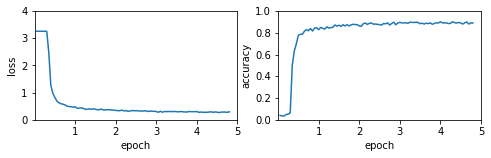

 85%|████████▍ | 26504/31200 [01:49<00:16, 285.09it/s]

epoch  5 : loss= 0.2871421141623824 , accuracy= 0.8740384615384615


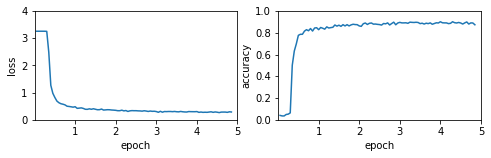

 90%|████████▉ | 28070/31200 [01:56<00:10, 286.74it/s]

epoch  5 : loss= 0.3000336441849168 , accuracy= 0.8942307692307693


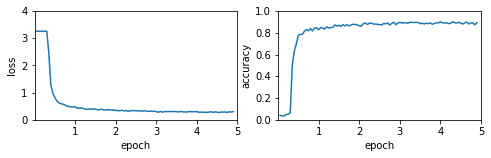

 95%|█████████▍| 29637/31200 [02:02<00:05, 287.67it/s]

epoch  5 : loss= 0.2904216809027275 , accuracy= 0.8875


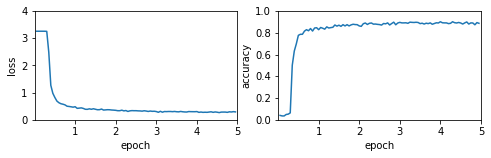

100%|█████████▉| 31176/31200 [02:09<00:00, 286.61it/s]

epoch  5 : loss= 0.2929361395898526 , accuracy= 0.8980769230769231


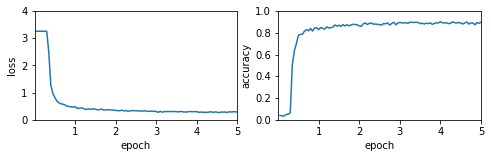

100%|██████████| 31200/31200 [02:10<00:00, 239.05it/s]


In [5]:
n_epoch=5
batch_size=4
steps_per_epoch=20
n_per_step=int(n_train/steps_per_epoch)
n_per_step=int(n_per_step/batch_size)*batch_size

train_dataloader=torch.utils.data.DataLoader(train_set,batch_size=batch_size,shuffle=True)
cv_dataloader=torch.utils.data.DataLoader(cv_set,batch_size=1,shuffle=False)
test_dataloader=torch.utils.data.DataLoader(test_set,batch_size=batch_size,shuffle=False)

loss_history=[]
accu_history=[]
for epoch in range(n_epoch):
    sample_cnt=n_per_step
    loss_sum=0
    for img,lbl in tqdm(train_dataloader):
        img=img.to(device)
        lbl=lbl.to(device)
        lbl-=1
        
        cls_optimizer.zero_grad()
        pred=cls(img)
        loss=loss_fn(pred,lbl)
        loss_sum+=loss.item()
        loss.backward()
        cls_optimizer.step()
        
        sample_cnt-=len(lbl)
        if sample_cnt<=0:
            loss_sum=loss_sum*batch_size/n_per_step
            correct=0
            with torch.no_grad():
                for img,lbl in cv_dataloader:
                    pred=cls(img)
                    _, pred_lbl = torch.max(pred.data, 1)
                    correct+=(pred_lbl==(lbl-1)).sum().item()
            accuracy=float(correct/n_cv)
            
            loss_history.append(loss_sum)
            accu_history.append(accuracy)
            print("epoch ",epoch+1,": loss=",loss_sum,", accuracy=",accuracy)
            plt.figure(figsize=(8,2));
            plt.subplot(1,2,1)
            plt.plot(range(1,len(loss_history)+1),loss_history);
            plt.xlim(0,n_epoch*steps_per_epoch); plt.ylim(0,4)
            plt.xticks(list(range(steps_per_epoch,steps_per_epoch*n_epoch+1,steps_per_epoch)),list(range(1,n_epoch+1)));
            plt.xlabel('epoch'); plt.ylabel('loss')
            plt.subplot(1,2,2)
            plt.plot(range(1,len(accu_history)+1),accu_history);
            plt.xlim(0,n_epoch*steps_per_epoch); plt.ylim(0,1)
            plt.xticks(list(range(steps_per_epoch,steps_per_epoch*n_epoch+1,steps_per_epoch)),list(range(1,n_epoch+1)));
            plt.xlabel('epoch'); plt.ylabel('accuracy')
            plt.show()
            loss_sum=0
            sample_cnt=n_per_step

After training the model, we save the parameters.

In [6]:
torch.save(cls,"./cnn_emnist_cls.pt")

### Evaluating the model
After the training, we measure the accuracy of the model on the testing dataset, which shows the accuracy slightly higher than 90%.

In [7]:
correct=0
with torch.no_grad():
    for img,lbl in tqdm(test_dataloader):
        pred=cls(img)
        _, pred_lbl = torch.max(pred.data, 1)
        correct+=(pred_lbl==(lbl-1)).sum().item()
print('Accuracy=',correct,'/',n_test,'=',float(correct/n_test))

100%|██████████| 4940/4940 [00:08<00:00, 559.10it/s]

Accuracy= 17960 / 19760 = 0.9089068825910931


For a postmortem, we present some prediction results along with the true label. Predicted labels are presented in the title of each image, while the true labels are presented in the paranthesis. Images highlighted with red boundaries are the cases of wrong predictions. By examining these cases, we might track down the cases that this classifier is not doing well.

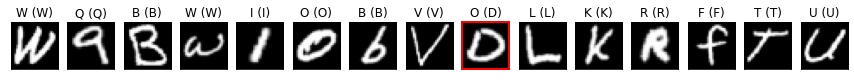

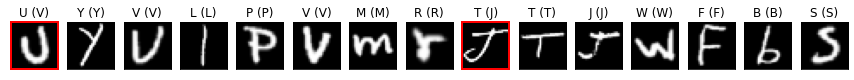

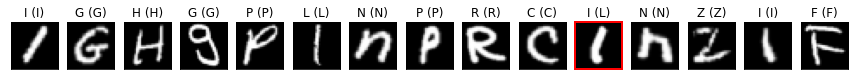

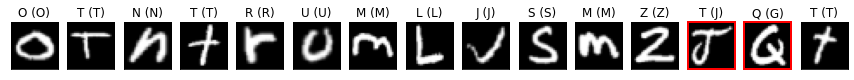

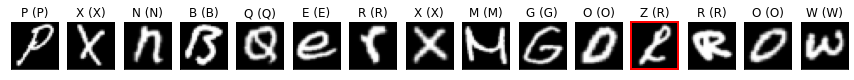

In [9]:
with torch.no_grad():
    remain_lines=5
    for imgs,lbls in test_dataloader:
        pred=cls(imgs)
        _, pred_lbls = torch.max(pred.data, 1)
        fig,axs=plt.subplots(1,n_show_sample,figsize=(n_show_sample,1))
        for i in range(n_show_sample):
            img=imgs[i]; lbl=lbls[i]; pred_lbl=pred_lbls[i]+1
            ax=axs[i]
            img=(img+1)/2
            ax.imshow(torch.transpose(img.view((28,28)),0,1))
            ax.set_xticks([]); ax.set_yticks([]);
            ax.set_title(letter_label[pred_lbl]+" ("+letter_label[lbl]+")")
            if pred_lbl!=lbl:
                for s in ax.spines:
                    ax.spines[s].set_color("red")
                    ax.spines[s].set_linewidth(2)
        remain_lines-=1
        if remain_lines<=0:
            break